<a href="https://colab.research.google.com/github/ai-music-generator/model-building-jupyter/blob/main/MusicGen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Generating Music using Deep Learning

**<u>Aim:</u>** Generate a playable audio track by training an <abbr title = "Artificial Intelligence">AI</abbr> model using relevant data.

## Technologies/Packages used:



### Technologies:
+ [Python](https://www.python.org/): A high-level, dynamically typed, general-purpose programming language with code reability as a design philosophy - <cite><a href = "https://en.wikipedia.org/wiki/Python_(programming_language)">Wikipedia</a></cite>
+ [Google <abbr title = "Colaboratory">Colab</abbr>](): Colab is a hosted Jupyter notebook service that requires no setup to use, while providing access free of charge to computing resources including GPUs. - <cite><a href = "https://research.google.com/colaboratory/faq.html">Google Colab</a></cite>

### Packages:

#### Internal:
+ [`collections`](https://docs.python.org/3/library/collections.html?highlight=collections#module-collections): Implements special container types providing alternatives to Python's general-purpose containers.
+ [`datetime`](https://docs.python.org/3/library/datetime.html?highlight=datetime#module-datetime): Supplies classes to work with timestamps.
+ [`glob`](https://docs.python.org/3/library/glob.html?highlight=glob#module-glob):  Finds all the pathnames matching a specified pattern according to the rules used by the Unix shell.
+ [`pathlib`](https://docs.python.org/3/library/pathlib.html?highlight=pathlib#module-pathlib): Offers classes representing filesystem paths with semantics appropriate for different operating systems.
+ [`typing`](https://docs.python.org/3/library/typing.html?highlight=typing#module-typing): This module provides runtime support for type hints.


#### External
+ [`fluidsynth`](https://www.fluidsynth.org/): FluidSynth is a software synthesizer based on the SoundFont 2 specifications.
  + [`pyfluidsynth`](https://github.com/nwhitehead/pyfluidsynth): Python bindings for [fluidsynth](`https://www.fluidsynth.org/`).
+[`IPython`](https://ipython.org/): Provides a rich architecture for interactive computing.
+ [`matplotlib`](https://matplotlib.org/): A library for creating static, animated and interactive visualizations.
+ [`numpy`](https://numpy.org/):A library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays. 
+ [`pandas`](https://pandas.pydata.org/): A software library written for the Python programming language for data manipulation and analysis.
+ [`pretty_midi`](https://github.com/craffel/pretty-midi): A library for manipulating <abbr title = "Musical Instrument Digital (MID) Interface">MIDI</abbr> files.
+ [`seaborn`](https://seaborn.pydata.org/): A high-level data visualization library built on top of [`matplotlib`](https://matplotlib.org/).
+ [`tensorflow`](https://www.tensorflow.org/): An open-source library for machine learning.

## Installing packages

In [ ]:
!sudo apt install -y fluidsynth

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fluid-soundfont-gm libfluidsynth2 libinstpatch-1.0-2 qsynth
  timgm6mb-soundfont
Suggested packages:
  fluid-soundfont-gs timidity jackd musescore
The following NEW packages will be installed:
  fluid-soundfont-gm fluidsynth libfluidsynth2 libinstpatch-1.0-2 qsynth
  timgm6mb-soundfont
0 upgraded, 6 newly installed, 0 to remove and 24 not upgraded.
Need to get 126 MB of archives.
After this operation, 157 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fluid-soundfont-gm all 3.1-5.1 [119 MB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 libinstpatch-1.0-2 amd64 1.1.2-2build1 [238 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 timgm6mb-soundfont all 1.3-3 [5,420 kB]
Get:4 http://archive.ubuntu.com/ubuntu focal/universe amd64 libfluidsynth2 amd64 2.1.1-2 [

In [ ]:
!pip install --upgrade pyfluidsynth
!pip install pretty_midi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 38.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 KB 6.5 MB/s eta 0:00:00
  Created wheel for pretty_midi: filename=pretty_midi-0.2.10-py3-none-any.whl size=5592303 sha256=4b7ea3c707dcfb27ef3baeefa027f2b8a9c3addec7e6c65f2c455ea86376b6f7
  Stored in directory: /root/.cache/pip/wheels/75/ec/20/b8e937a5bcf1de547ea5ce465db7de7f6761e15e6f0a01e25f
Successfully built pretty_midi


## Importing packages

In [ ]:
import collections
import datetime
import fluidsynth
import glob
import numpy as np
import pathlib
import pandas as pd
import pretty_midi
import seaborn as sns
import tensorflow as tf

from IPython import display
from matplotlib import pyplot as plt
from typing import Dict, List, Optional, Sequence, Tuple

### Description:
+ **seed**: A variable used to initialize a <abbr title = "Random Number Generator">RNG</abbr>. Manually setting this value allows generated values to be deterministic.
+ **Sampling rate**: The number of samples per second (or per other unit) taken from a continuous signal to make a discrete or digital signal.

In [ ]:
seed = 42
tf.random.set_seed(seed)
np.random.seed(seed)

# Sampling rate for audio playback
_SAMPLING_RATE = 16000

## Dataset description

<abbr title = "MIDI and Audio Edited for Synchronous TRacks and Organization">MAESTRO</abbr> is a dataset composed of about 200 hours of virtuosic piano performances captured with fine alignment (~3 ms) between note labels and audio waveforms - [MAESTRO dataset](https://magenta.tensorflow.org/datasets/maestro).
This code uses the latest MIDI version of the dataset due to its smaller memory footprint over the MP3 version.

<abbr title = "Musical Instruments Digital (MID) Interface">MIDI</abbr> is a technical standard that describes a communications protocol, digital interface, and electrical connectors that connect a wide variety of electronic musical instruments, computers, and related audio devices for playing, editing, and recording music.

## Downloading the dataset

In [ ]:
data_dir = pathlib.Path('data/maestro-v3.0.0')
if not data_dir.exists():
  tf.keras.utils.get_file(
      'maestro-v3.0.0-midi.zip',
      origin='https://storage.googleapis.com/magentadata/datasets/maestro/v3.0.0/maestro-v3.0.0-midi.zip',
      extract=True,
      cache_dir='.', cache_subdir='data',
  )

58416533/58416533 [==============================] - 3s 0us/step


### Finding total number of files

In [ ]:
filenames = glob.glob(str(data_dir/'**/*.mid*'))
print('Number of files:', len(filenames))

Number of files: 1276


In [ ]:
sample_file = filenames[1]
print(sample_file)

data/maestro-v3.0.0/2015/MIDI-Unprocessed_R1_D1-1-8_mid--AUDIO-from_mp3_05_R1_2015_wav--4.midi


### Playing a MIDI file

In [ ]:
pm = pretty_midi.PrettyMIDI(sample_file)

In [ ]:
def display_audio(pm: pretty_midi.PrettyMIDI, seconds=30):
  waveform = pm.fluidsynth(fs=_SAMPLING_RATE)
  # Take a sample of the generated waveform to mitigate kernel resets
  waveform_short = waveform[:seconds*_SAMPLING_RATE]
  return display.Audio(waveform_short, rate=_SAMPLING_RATE)

In [ ]:
display_audio(pm)

### Number of instruments used

In [ ]:
print('Number of instruments:', len(pm.instruments))
instrument = pm.instruments[0]
instrument_name = pretty_midi.program_to_instrument_name(instrument.program)
print('Instrument name:', instrument_name)

Number of instruments: 1
Instrument name: Acoustic Grand Piano


### Print the pitch, note and duration of the first ten entries

In [ ]:
for i, note in enumerate(instrument.notes[:10]):
  note_name = pretty_midi.note_number_to_name(note.pitch)
  duration = note.end - note.start
  print(f'{i}: pitch={note.pitch}, note_name={note_name},'
        f' duration={duration:.4f}')

0: pitch=68, note_name=G#4, duration=0.1052
1: pitch=67, note_name=G4, duration=0.1000
2: pitch=65, note_name=F4, duration=0.0802
3: pitch=62, note_name=D4, duration=0.0917
4: pitch=63, note_name=D#4, duration=0.0396
5: pitch=62, note_name=D4, duration=0.0823
6: pitch=59, note_name=B3, duration=0.0823
7: pitch=55, note_name=G3, duration=0.0792
8: pitch=56, note_name=G#3, duration=0.0458
9: pitch=55, note_name=G3, duration=0.0760


## Function to convert a MIDI file to a pandas DataFrame

In [ ]:
def midi_to_notes(midi_file: str) -> pd.DataFrame:
  pm = pretty_midi.PrettyMIDI(midi_file)
  instrument = pm.instruments[0]
  notes = collections.defaultdict(list)

  # Sort the notes by start time
  sorted_notes = sorted(instrument.notes, key=lambda note: note.start)
  prev_start = sorted_notes[0].start

  for note in sorted_notes:
    start = note.start
    end = note.end
    notes['pitch'].append(note.pitch)
    notes['start'].append(start)
    notes['end'].append(end)
    notes['step'].append(start - prev_start)
    notes['duration'].append(end - start)
    prev_start = start

  return pd.DataFrame({name: np.array(value) for name, value in notes.items()})

In [ ]:
raw_notes = midi_to_notes(sample_file)
raw_notes.head()

,pitch,start,end,step,duration
0,83,0.991667,3.190625,0.000000,2.198958
1,71,0.991667,3.203125,0.000000,2.211458
2,74,0.996875,3.238542,0.005208,2.241667
3,79,1.001042,3.238542,0.004167,2.237500
4,77,1.001042,3.245833,0.000000,2.244792


In [ ]:
get_note_names = np.vectorize(pretty_midi.note_number_to_name)
sample_note_names = get_note_names(raw_notes['pitch'])
sample_note_names[:10]

array(['B5', 'B4', 'D5', 'G5', 'F5', 'G#4', 'G4', 'F4', 'D4', 'D#4'],
      dtype='<U3')

## Plotting a track (time vs pitch)

In [ ]:
def plot_piano_roll(notes: pd.DataFrame, count: Optional[int] = None):
  if count:
    title = f'First {count} notes'
  else:
    title = f'Whole track'
    count = len(notes['pitch'])
  plt.figure(figsize=(20, 4))
  plot_pitch = np.stack([notes['pitch'], notes['pitch']], axis=0)
  plot_start_stop = np.stack([notes['start'], notes['end']], axis=0)
  plt.plot(
      plot_start_stop[:, :count], plot_pitch[:, :count], color="b", marker=".")
  plt.xlabel('Time [s]')
  plt.ylabel('Pitch')
  _ = plt.title(title)

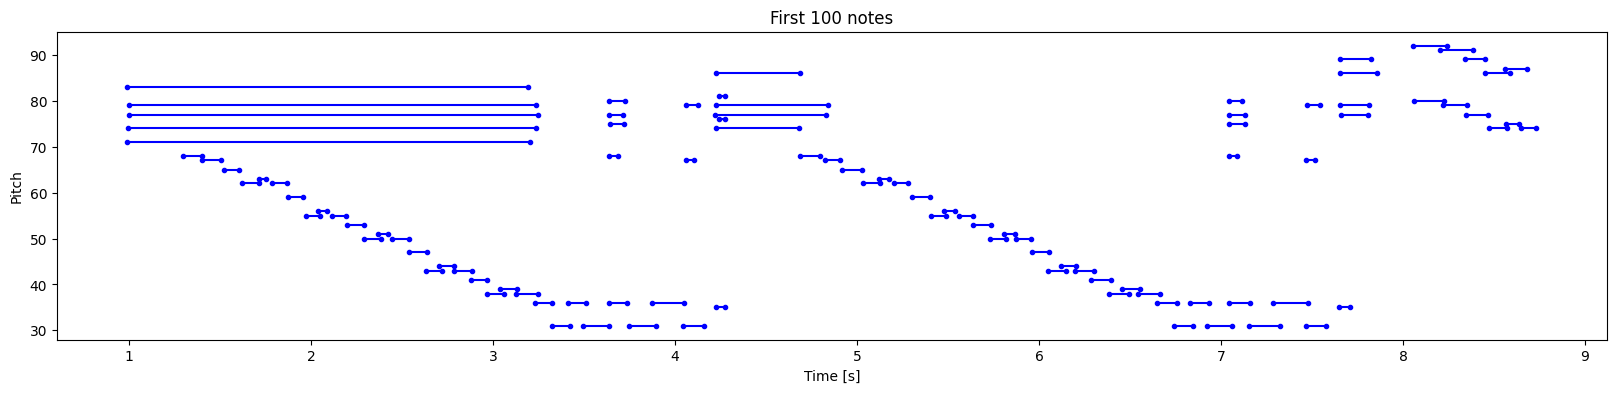

In [ ]:
plot_piano_roll(raw_notes, count=100)

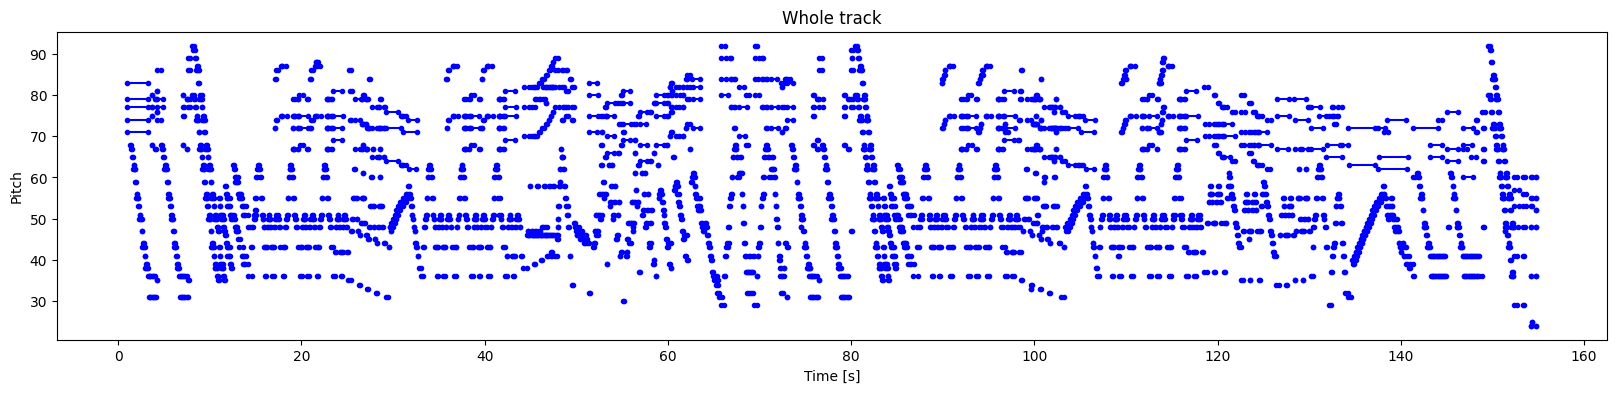

In [ ]:
plot_piano_roll(raw_notes)

## Visualizing the distributions of pitch, step and notes across the dataset.

In [ ]:
def plot_distributions(notes: pd.DataFrame, drop_percentile=2.5):
  plt.figure(figsize=[15, 5])
  plt.subplot(1, 3, 1)
  sns.histplot(notes, x="pitch", bins=20)

  plt.subplot(1, 3, 2)
  max_step = np.percentile(notes['step'], 100 - drop_percentile)
  sns.histplot(notes, x="step", bins=np.linspace(0, max_step, 21))

  plt.subplot(1, 3, 3)
  max_duration = np.percentile(notes['duration'], 100 - drop_percentile)
  sns.histplot(notes, x="duration", bins=np.linspace(0, max_duration, 21))

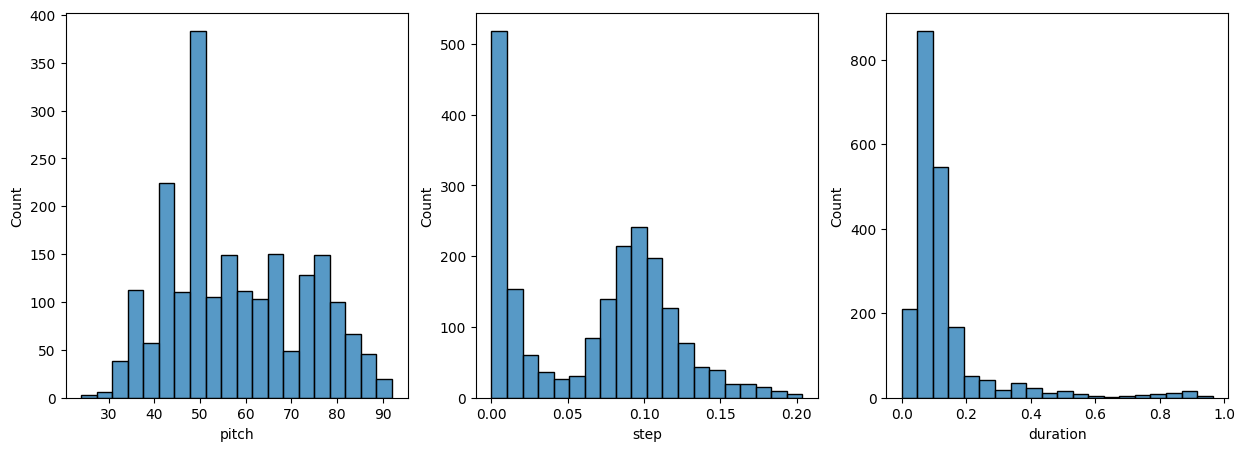

In [ ]:
plot_distributions(raw_notes)

## Function to convert a pandas DataFrame to a MIDI file

In [ ]:
def notes_to_midi(
  notes: pd.DataFrame,
  out_file: str, 
  instrument_name: str,
  velocity: int = 100,  # note loudness
) -> pretty_midi.PrettyMIDI:

  pm = pretty_midi.PrettyMIDI()
  instrument = pretty_midi.Instrument(
      program=pretty_midi.instrument_name_to_program(
          instrument_name))

  prev_start = 0
  for i, note in notes.iterrows():
    start = float(prev_start + note['step'])
    end = float(start + note['duration'])
    note = pretty_midi.Note(
        velocity=velocity,
        pitch=int(note['pitch']),
        start=start,
        end=end,
    )
    instrument.notes.append(note)
    prev_start = start

  pm.instruments.append(instrument)
  pm.write(out_file)
  return pm

In [ ]:
example_file = 'example.midi'
example_pm = notes_to_midi(
    raw_notes, out_file=example_file, instrument_name=instrument_name)

In [ ]:
display_audio(example_pm)

## Generating the dataset

In [ ]:
num_files = 5
all_notes = []
for f in filenames[:num_files]:
  notes = midi_to_notes(f)
  all_notes.append(notes)

all_notes = pd.concat(all_notes)

In [ ]:
n_notes = len(all_notes)
print('Number of notes parsed:', len(all_notes))

Number of notes parsed: 21509


In [ ]:
key_order = ['pitch', 'step', 'duration']
train_notes = np.stack([all_notes[key] for key in key_order], axis=1)

In [ ]:
notes_ds = tf.data.Dataset.from_tensor_slices(train_notes)
notes_ds.element_spec

TensorSpec(shape=(3,), dtype=tf.float64, name=None)

In [ ]:
def create_sequences(
    dataset: tf.data.Dataset, 
    seq_length: int,
    vocab_size = 128,
) -> tf.data.Dataset:
  """Returns TF Dataset of sequence and label examples."""
  seq_length = seq_length+1

  # Take 1 extra for the labels
  windows = dataset.window(seq_length, shift=1, stride=1,
                              drop_remainder=True)

  # `flat_map` flattens the" dataset of datasets" into a dataset of tensors
  flatten = lambda x: x.batch(seq_length, drop_remainder=True)
  sequences = windows.flat_map(flatten)

  # Normalize note pitch
  def scale_pitch(x):
    x = x/[vocab_size,1.0,1.0]
    return x

  # Split the labels
  def split_labels(sequences):
    inputs = sequences[:-1]
    labels_dense = sequences[-1]
    labels = {key:labels_dense[i] for i,key in enumerate(key_order)}

    return scale_pitch(inputs), labels

  return sequences.map(split_labels, num_parallel_calls=tf.data.AUTOTUNE)

In [ ]:
seq_length = 25
vocab_size = 128
seq_ds = create_sequences(notes_ds, seq_length, vocab_size)
seq_ds.element_spec

(TensorSpec(shape=(25, 3), dtype=tf.float64, name=None),
 {'pitch': TensorSpec(shape=(), dtype=tf.float64, name=None),
  'step': TensorSpec(shape=(), dtype=tf.float64, name=None),
  'duration': TensorSpec(shape=(), dtype=tf.float64, name=None)})

In [ ]:
for seq, target in seq_ds.take(1):
  print('sequence shape:', seq.shape)
  print('sequence elements (first 10):', seq[0: 10])
  print()
  print('target:', target)

sequence shape: (25, 3)
sequence elements (first 10): tf.Tensor(
[[0.5        0.         0.71770833]
 [0.46875    0.00729167 0.77395833]
 [0.4296875  0.01770833 1.29479167]
 [0.375      0.00729167 1.48229167]
 [0.484375   0.78333333 0.04895833]
 [0.4609375  0.009375   0.05520833]
 [0.5        0.06770833 0.06145833]
 [0.46875    0.06145833 0.046875  ]
 [0.484375   0.01145833 0.05520833]
 [0.4609375  0.028125   0.03854167]], shape=(10, 3), dtype=float64)

target: {'pitch': <tf.Tensor: shape=(), dtype=float64, numpy=59.0>, 'step': <tf.Tensor: shape=(), dtype=float64, numpy=0.00416666666666643>, 'duration': <tf.Tensor: shape=(), dtype=float64, numpy=1.2958333333333334>}


In [ ]:
batch_size = 64
buffer_size = n_notes - seq_length  # the number of items in the dataset
train_ds = (seq_ds
            .shuffle(buffer_size)
            .batch(batch_size, drop_remainder=True)
            .cache()
            .prefetch(tf.data.experimental.AUTOTUNE))

In [ ]:
train_ds.element_spec

(TensorSpec(shape=(64, 25, 3), dtype=tf.float64, name=None),
 {'pitch': TensorSpec(shape=(64,), dtype=tf.float64, name=None),
  'step': TensorSpec(shape=(64,), dtype=tf.float64, name=None),
  'duration': TensorSpec(shape=(64,), dtype=tf.float64, name=None)})

## Error function

In [ ]:
def mse_with_positive_pressure(y_true: tf.Tensor, y_pred: tf.Tensor):
  mse = (y_true - y_pred) ** 2
  positive_pressure = 10 * tf.maximum(-y_pred, 0.0)
  return tf.reduce_mean(mse + positive_pressure)

## LSTM (Long-Short Term Memory)
> <abbr title = "Long Short Term Memory">LSTM</abbr> is an artificial neural network used in the fields of artificial intelligence and deep learning. Unlike standard feedforward neural networks, LSTM has feedback connections. Such a recurrent neural network (RNN) can process not only single data points (such as images), but also entire sequences of data (such as speech or video) - [Wikipedia](https://en.wikipedia.org/wiki/Long_short-term_memory)

In much simpler terms, a LSTM model processes the current input using past state(s) (from recent to oldest). This makes it ideal to process sequential data (like videos, text corpora etc.) over a traditional <abbr title = "Recurrent Neural network">RNN</abbr>.

### Advantages
+ ***Ability to capture long-term dependencies***: LSTMs are designed to remember information from earlier parts of a sequence, which makes them well-suited for tasks that require modeling long-term dependencies between input and output sequences.
+ ***Flexibility in input and output sequence lengths***: Unlike traditional feedforward neural networks, LSTMs are capable of handling variable-length input and output sequences, which makes them ideal for processing sequences with variable lengths.
+ ***Robustness to noisy data***: LSTMs are capable of handling noisy or missing data in input sequences, which makes them a useful tool in domains where data quality may be less than perfect.


### Disadvantages

+ ***Computational complexity***: LSTMs can be computationally expensive to train and require a significant amount of resources to run, especially for large-scale applications.
+ ***Overfitting***: As with any deep learning model, LSTMs are prone to overfitting on training data, which can lead to poor generalization performance on new data.
+ ***Interpretability***: LSTMs are complex models with many parameters, which makes it difficult to understand and interpret the learned representations and decision-making process.


## Adam Optimizer
Adaptive Moment Estimation is an algorithm for optimization technique for gradient descent. The method is really efficient when working with large problem involving a lot of data or parameters.  Intuitively, it is a combination of the ‘gradient descent with momentum’ algorithm and the ‘RMSP’ algorithm

## Model description

We will be using a <abbr title = "Long Short Term Memory">LSTM</abbr>-based model to predict the next note.

The inputs in this case are a 
$seq\_length * 3$ array where the pitch, step and duration correspond to the three columns.

The outputs are pitch, step and duration respectively. These outputs will then allow us to generate a note afterwards.

We will be using the Sparse Categorical Crossentropy as an error function for pitch, while our custom error function will be used on both step and duration.

We will be using the Adam algorithm as our optimizer.

In [ ]:
input_shape = (seq_length, 3)
learning_rate = 0.005

inputs = tf.keras.Input(input_shape)
x = tf.keras.layers.LSTM(128)(inputs)
print(x.shape)

outputs = {
  'pitch': tf.keras.layers.Dense(128, name='pitch')(x),
  'step': tf.keras.layers.Dense(1, name='step')(x),
  'duration': tf.keras.layers.Dense(1, name='duration')(x),
}
print({key:value.shape} for key, value in outputs.items())
model = tf.keras.Model(inputs, outputs)

loss = {
      'pitch': tf.keras.losses.SparseCategoricalCrossentropy(
          from_logits=True),
      'step': mse_with_positive_pressure,
      'duration': mse_with_positive_pressure,
}

optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

model.compile(
    loss=loss,
    loss_weights={
        'pitch': 0.05,
        'step': 1.0,
        'duration':1.0,
    },
    optimizer=optimizer,
)

model.summary()

(None, 128)
<generator object <genexpr> at 0x7fe53c157dd0>
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 25, 3)]      0           []                               
                                                                                                  
 lstm (LSTM)                    (None, 128)          67584       ['input_1[0][0]']                
                                                                                                  
 duration (Dense)               (None, 1)            129         ['lstm[0][0]']                   
                                                                                                  
 pitch (Dense)                  (None, 128)          16512       ['lstm[0][0]']                   
                                   

In [ ]:
losses = model.evaluate(train_ds, return_dict=True)
losses

335/335 [==============================] - 20s 26ms/step - loss: 0.4350 - duration_loss: 0.1592 - pitch_loss: 4.8540 - step_loss: 0.0330


{'loss': 0.43497270345687866,
 'duration_loss': 0.15924543142318726,
 'pitch_loss': 4.854004859924316,
 'step_loss': 0.0330270491540432}

We provide callbacks to save the weights and also stop the training if we get the best weights before our trainin completes.

In [ ]:
callbacks = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath='./training_checkpoints/ckpt_{epoch}',
        save_weights_only=True),
    tf.keras.callbacks.EarlyStopping(
        monitor='loss',
        patience=5,
        verbose=1,
        restore_best_weights=True),
]

In [ ]:
%%time
epochs = 50

history = model.fit(
    train_ds,
    epochs=epochs,
    callbacks=callbacks,
)

Epoch 1/50
335/335 [==============================] - 19s 47ms/step - loss: 0.3277 - duration_loss: 0.0951 - pitch_loss: 4.0197 - step_loss: 0.0316
Epoch 2/50
335/335 [==============================] - 16s 47ms/step - loss: 0.3134 - duration_loss: 0.0915 - pitch_loss: 3.8551 - step_loss: 0.0292
Epoch 3/50
335/335 [==============================] - 17s 52ms/step - loss: 0.3114 - duration_loss: 0.0905 - pitch_loss: 3.8433 - step_loss: 0.0288
Epoch 4/50
335/335 [==============================] - 15s 46ms/step - loss: 0.3086 - duration_loss: 0.0897 - pitch_loss: 3.8145 - step_loss: 0.0283
Epoch 5/50
335/335 [==============================] - 20s 59ms/step - loss: 0.3055 - duration_loss: 0.0891 - pitch_loss: 3.7794 - step_loss: 0.0275
Epoch 6/50
335/335 [==============================] - 16s 48ms/step - loss: 0.3026 - duration_loss: 0.0874 - pitch_loss: 3.7609 - step_loss: 0.0271
Epoch 7/50
335/335 [==============================] - 16s 47ms/step - loss: 0.2998 - duration_loss: 0.0854 - pit

### Plot a graph representing the total loss over the epochs

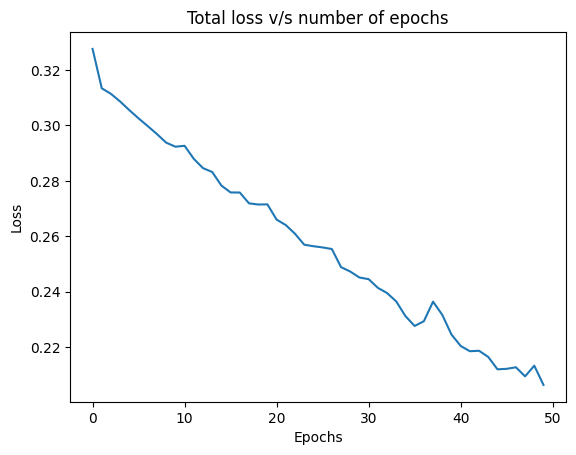

In [ ]:
plt.plot(history.epoch, history.history['loss'], label='total loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Total loss v/s number of epochs")
plt.show()

## Generating a note

In [ ]:
def predict_next_note(
    notes: np.ndarray, 
    keras_model: tf.keras.Model, 
    temperature: float = 1.0) -> int:
  """Generates a note using a trained sequence model."""

  assert temperature > 0

  # Add batch dimension
  inputs = tf.expand_dims(notes, 0)

  predictions = model.predict(inputs)
  pitch_logits = predictions['pitch']
  step = predictions['step']
  duration = predictions['duration']

  pitch_logits /= temperature
  pitch = tf.random.categorical(pitch_logits, num_samples=1)
  pitch = tf.squeeze(pitch, axis=-1)
  duration = tf.squeeze(duration, axis=-1)
  step = tf.squeeze(step, axis=-1)

  # `step` and `duration` values should be non-negative
  step = tf.maximum(0, step)
  duration = tf.maximum(0, duration)

  return int(pitch), float(step), float(duration)

## Generating a sequence of notes

In [ ]:
temperature = 2.0
num_predictions = 120

sample_notes = np.stack([raw_notes[key] for key in key_order], axis=1)

# The initial sequence of notes; pitch is normalized similar to training
# sequences
input_notes = (
    sample_notes[:seq_length] / np.array([vocab_size, 1, 1]))

generated_notes = []
prev_start = 0
for _ in range(num_predictions):
  pitch, step, duration = predict_next_note(input_notes, model, temperature)
  start = prev_start + step
  end = start + duration
  input_note = (pitch, step, duration)
  generated_notes.append((*input_note, start, end))
  input_notes = np.delete(input_notes, 0, axis=0)
  input_notes = np.append(input_notes, np.expand_dims(input_note, 0), axis=0)
  prev_start = start

generated_notes = pd.DataFrame(
    generated_notes, columns=(*key_order, 'start', 'end'))

1/1 [==============================] - 0s 24ms/step


In [ ]:
generated_notes.head(10)

,pitch,step,duration,start,end
0,45,0.080792,0.127270,0.080792,0.208062
1,91,0.244291,1.329731,0.325084,1.654814
2,91,0.199021,1.301474,0.524105,1.825579
3,58,0.180589,1.211488,0.704694,1.916182
4,77,0.173627,1.185707,0.878321,2.064028
5,60,0.176046,1.133531,1.054367,2.187898
6,53,0.175973,1.124356,1.230339,2.354696
7,75,0.175649,1.124270,1.405989,2.530259
8,41,0.173290,1.124809,1.579279,2.704088
9,72,0.178204,1.107101,1.757484,2.864584


In [ ]:
out_file = 'output.mid'
out_pm = notes_to_midi(
    generated_notes, out_file=out_file, instrument_name=instrument_name)
display_audio(out_pm)

## Plot the pitch distribution over the generated  track

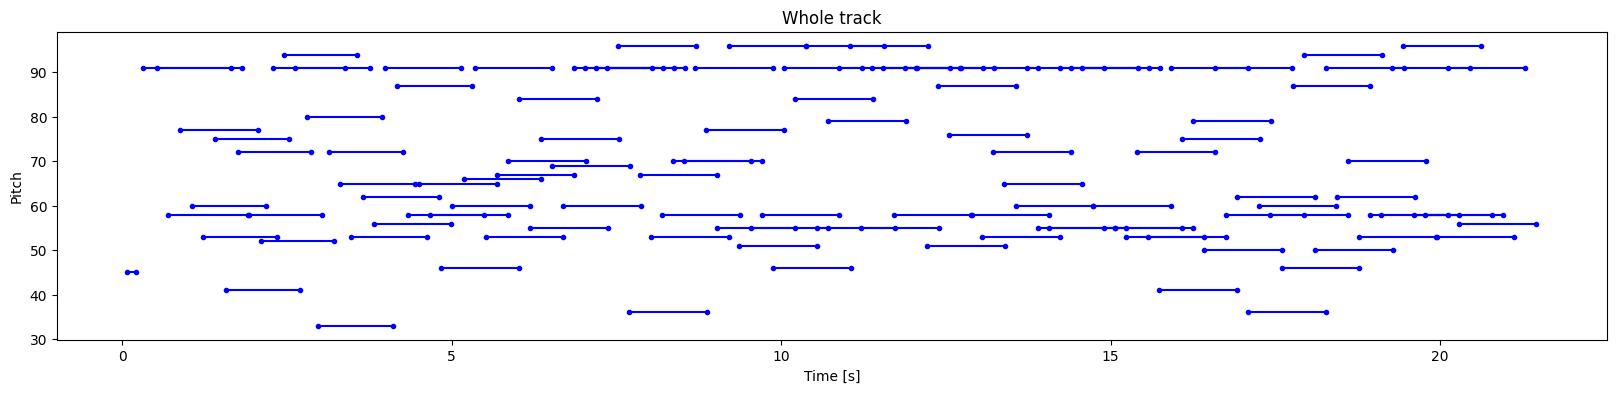

In [ ]:
plot_piano_roll(generated_notes)

## Visualizing the distributions of pitch, step and notes across the generated file

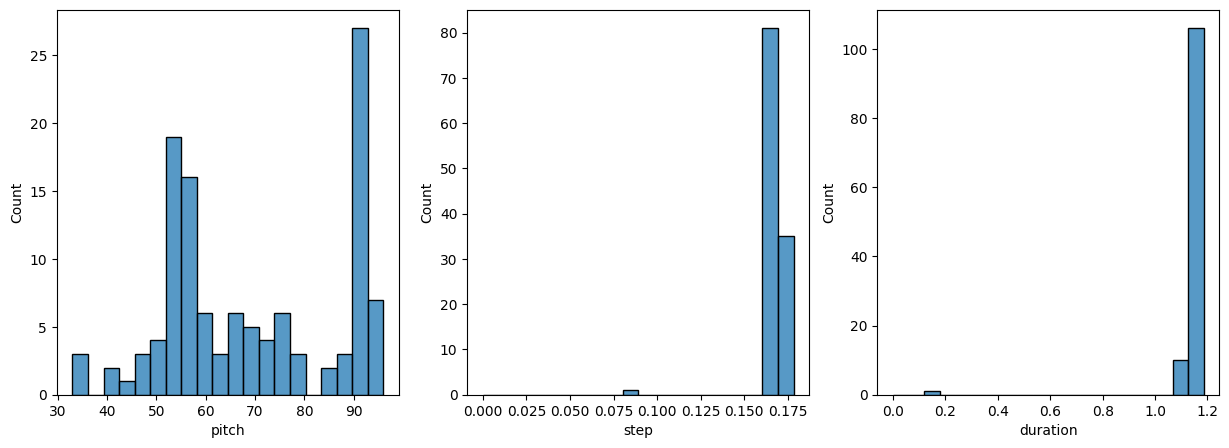

In [ ]:
plot_distributions(generated_notes)